## Scikit Learn Assignment Template

1.  Create an empty notebook for the assignment
2.  Copy the cells from this template to your notebook
3.  Add your code to cells 2, 4, 5, 8, and 12  to generate (similar) results as shown in the template
4.  In cell 13, write you summary
5.  Fully excecute your notebook and submit the result

In [ ]:
#import the needed packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# read in app_usage data into vpn_df

##############################################
## type your code here to create vpn dataframe
vpn_df= pd.read_csv(r'/content/app_usage.csv')
##############################################

In [ ]:
#oberve the data
#RemoteAccess is the target, we will build a model that
#takes all other columns as X to predict remote VPN usage

#look at the shape of the dataframe
print(vpn_df.shape)

#look at the column names
print(vpn_df.columns)

#show the first 5 records
print(vpn_df.head(5))

(91, 11)
Index(['CRM', 'CloudDrive', 'ERP', 'Expenses', 'HR1', 'HR2', 'ITOps', 'OTHER',
       'Recruiting', 'Webmail', 'RemoteAccess'],
      dtype='object')
   CRM  CloudDrive  ERP  Expenses  HR1  HR2  ITOps  OTHER  Recruiting  \
0   49          99   17        38    0    0     18    144          33   
1  107         148   28        54    0    0     38    188          30   
2  639         796  221       216    0    0    133   1175         297   
3  653         767  203       191    0    0    139   1475         308   
4  670         738  196       140    0    0    128   1111         305   

   Webmail  RemoteAccess  
0      141           283  
1      213           430  
2      579           732  
3      549           738  
4      678           781  


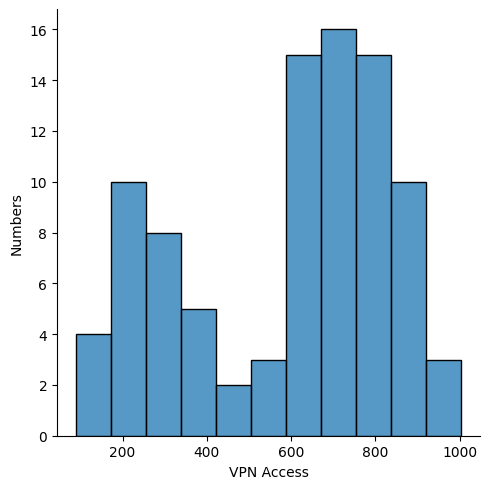

In [ ]:
#Visualize data

#1. See the distribtuion of Remote VPN Access

################################################################
## Create a histogram of VPN usage close to the display below####
## the answers may vary                                 ########

#################################################################

y_ = vpn_df["RemoteAccess"]
ax = sns.displot(y_, bins=11, kde=False)
ax.set(xlabel = "VPN Access", ylabel = "Numbers")


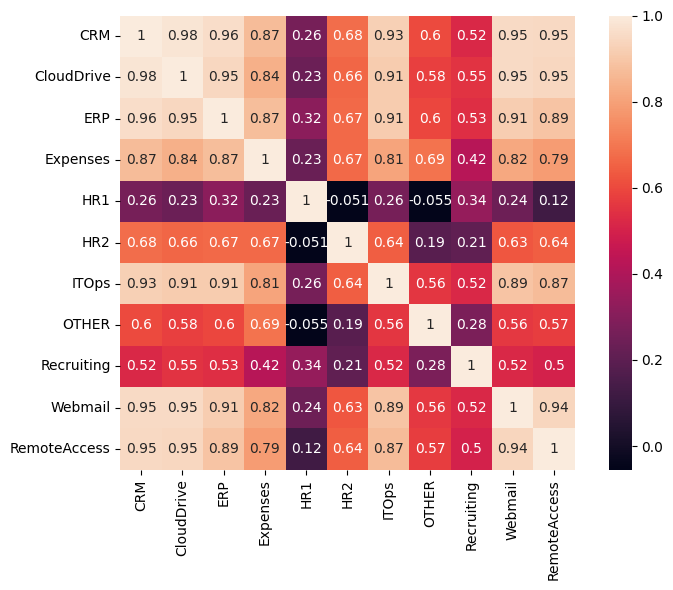

In [ ]:
#2. See the correlation heat map

################################################################
## Create a correlation heatmap close to the display below  ####
## the answers may vary                                 ########

g, ax = plt.subplots(figsize=(8,6))
correl_matrix = vpn_df.corr()
sns.heatmap(correl_matrix, square=True, annot=True)
g.tight_layout()


In [ ]:
#We determine that this is supervised machine learning problem
#Linear Regression can be a good model
from sklearn import linear_model

In [ ]:
#The function takes X, y and retrun the trained model and R squared
def train_model(X,y):
    model = linear_model.LinearRegression()
    model.fit(X, y)
    R_2 = model.score(X,y)
    return model, R_2
#create a function to calculate Adjusted R_square
# n is the number of sample, p is the number features
def cal_adjusted_R(R_2, p, n):
    R_adjusted = R_2-(1-R_2)*(p/(n-p-1))
    return R_adjusted

In [ ]:
#R_2_array
R_2_array = np.array([])
#Calcuating the R_squared
for col_name in vpn_df.columns:
    if col_name == 'RemoteAccess':
        continue
    else:
        # add your code here:
        ################################################################
        ## call the train_model() function to calculate R squared   ####
        X_feature = vpn_df[[col_name]]
        target = vpn_df[['RemoteAccess']]
        model, R_2 = train_model(X_feature, target)
        print(col_name, R_2)
        R_2_array =  np.append(R_2_array, R_2)
        #################################################################
sorted_R_2_index = np.argsort(R_2_array)[::-1]
#print out the sorted indexes
print("The order of index numbers are : \t", sorted_R_2_index)

CRM 0.9030603942302714
CloudDrive 0.8932567722424455
ERP 0.7904301126742891
Expenses 0.6232665636003503
HR1 0.015308027253735923
HR2 0.4142858559100606
ITOps 0.7566204951691913
OTHER 0.3268756160241403
Recruiting 0.24953322751414386
Webmail 0.8847819743305698
The order of index numbers are : 	 [0 1 9 2 6 3 5 7 8 4]


In [ ]:
#gradually build up our model and add R squared and adjusted R to the output

for i in range(len(sorted_R_2_index)):

    #the selected_features should be the top i most associated features
    selected_features = []

    #take the top 1 to ith features as X
    for j in range(i+1):

            #append a new column based on the sorted R value
            #take your time to digest this line
            selected_features.append(vpn_df.columns[sorted_R_2_index[j]])

    #verify we got the right features
    print(selected_features)

    # X
    X_feature = vpn_df[selected_features]

    # y
    target = vpn_df[['RemoteAccess']]

    # train the model
    model, R_2 = train_model(X_feature, target)

    #calculate adjusted R
    R_adjusted = cal_adjusted_R(R_2, i+1, vpn_df.shape[0])

    #print the output
    print("R2: ", R_2, "\t Ajusted R2: ", R_adjusted, "\n")

['CRM']
R2:  0.9030603942302714 	 Ajusted R2:  0.901971185176679 

['CRM', 'CloudDrive']
R2:  0.9074773125587101 	 Ajusted R2:  0.9053745242077718 

['CRM', 'CloudDrive', 'Webmail']
R2:  0.91697207235234 	 Ajusted R2:  0.9141090403644897 

['CRM', 'CloudDrive', 'Webmail', 'ERP']
R2:  0.924310482006334 	 Ajusted R2:  0.9207900393089542 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps']
R2:  0.9245040709947892 	 Ajusted R2:  0.9200631339944826 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses']
R2:  0.9261180813990764 	 Ajusted R2:  0.9208408014990104 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2']
R2:  0.9268374090661093 	 Ajusted R2:  0.9206670700716848 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2', 'OTHER']
R2:  0.9303318238786106 	 Ajusted R2:  0.9235349286472555 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2', 'OTHER', 'Recruiting']
R2:  0.9305073579887443 	 Ajusted R2:  0.922785953320827 

['CRM', 'CloudDr

In [ ]:
y_ = vpn_df['RemoteAccess']
X = vpn_df.drop('RemoteAccess', axis=1)
model=linear_model.LinearRegression()
#Training the model
model.fit(X,y_)
#Display the parameters
print('Intercept: \n', model.intercept_)
print('Coefficients:\n', model.coef_)
print('R_squared: \n', model.score(X,y_))

Intercept: 
 168.76868273498133
Coefficients:
 [ 0.78030166  0.02552479 -0.3614915  -0.22380617 -0.14305536 -0.02601244
 -0.14498212 -0.01503002  0.02986555  0.32726658]
R_squared: 
 0.9392847759700534


In [ ]:
# Should we reduce the number of features?
from IPython.display import IFrame
IFrame('http://abbottanalytics.blogspot.com/2004/12/find-correlated-variables-prior-to.html', width=1200, height=300)

In [ ]:
# Find variance of individual columns in dataframe
vpn_df.drop(["CRM", "CloudDrive", "RemoteAccess", "ITOps", "HR2", "Recruiting"], axis=1).var().sort_values()

,0
Expenses,8369.025397
ERP,8784.632234
HR1,57291.004884
Webmail,57887.074725
OTHER,131016.658852


In [ ]:
# Find variance of individual columns in dataframe
vpn_df.drop(["CRM", "CloudDrive", "RemoteAccess", "ITOps", "HR2", "Recruiting"], axis=1).var().sort_values()

X = vpn_df.drop(["Webmail", "CloudDrive", "RemoteAccess", "ITOps", "HR2", "Recruiting", "ERP", "Expenses"], axis=1)
print(X.columns)
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


best_score = 0
best_alpha = 0
# let's fine tune alpha to find the model we need
for alpha in np.linspace(1, 0.2, 1000):

    # create a linear regression (Lasso) model from linear_model package,
    # and use a pipeline to standardize the data before applying Lasso
    # since 'normalize' is deprecated.
    model = make_pipeline(StandardScaler(), Lasso(alpha=alpha, max_iter=1*(10)**5))

    # Train the model with our data (X, y)
    model.fit(X,y_)

    # Find a model that uses exactly 3 features.
    # Output the score of this model (R squared) and corresponding alpha value.
    score = model.score(X, y_)

    if score > best_score:
        best_score = score
        best_alpha = alpha

print("The best R of my 3-feature model is:\t\t", best_score)
print("The alpha I used in Lasso to find my model is: \t", best_alpha)

#use R squared to see how much variation is explained by the trained model
print('R_squared: \n', best_score)

Index(['CRM', 'HR1', 'OTHER'], dtype='object')
The best R of my 3-feature model is:		 0.9216821750364943
The alpha I used in Lasso to find my model is: 	 0.2
R_squared: 
 0.9216821750364943


### Summarize how you eliminated some features. Which 3 features are in your model. Compare the R squared value of your model with one using all the features, explain why your model is a reasonably better model.

In [ ]:
##### Write your summary here
print("My summary: The best R-score of the given model is 0.92168 and the best features are crm, hr1, other.")
print("the 3 features in my model are: After sorting them according to variance, I decided to preserve the feature of the column with the largest variance (OTHERS) and eliminate the remaining ones. The R adjusted dropped when the ITOps, HR2, and Recruiting columns were introduced, thus I was able to remove them straight away. Because of their higher than 0.9 correlation with the target column, RemoteAccess, I removed two of the CloudDrive and Webmail columns. ")

My summary: The best R-score of the given model is 0.92168 and the best features are crm, hr1, other.
the 3 features in my model are: After sorting them according to variance, I decided to preserve the feature of the column with the largest variance (OTHERS) and eliminate the remaining ones. The R adjusted dropped when the ITOps, HR2, and Recruiting columns were introduced, thus I was able to remove them straight away. Because of their higher than 0.9 correlation with the target column, RemoteAccess, I removed two of the CloudDrive and Webmail columns. 
